# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Boni 

Student name: Filippo
    
ID: 2057137

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 123456789
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600 #small because could take time to do k-fold cv (if powerful pc use a larger number)
m_test = 4000

#why m_training<m_test? #small because could take time to do k-fold cv (if powerful pc use a larger number)

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

print(X_train[0])
print(X_train[0].shape)
print(X_train.shape)


labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


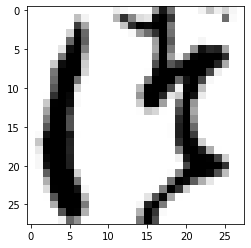

LABEL: 3
INPUT:


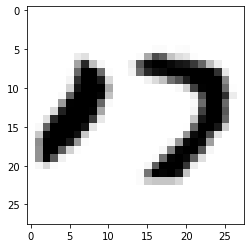

LABEL: 5
INPUT:


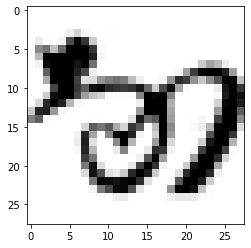

LABEL: 4
INPUT:


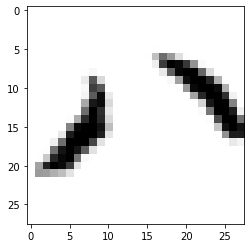

LABEL: 5


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC #rember use 
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1 , 10]}


#train linear SVM

svc = SVC(kernel='linear')


grid = GridSearchCV(svc, parameters, cv=4)

grid.fit(X_train,y_train)



print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(grid.best_params_)

c=grid.best_params_['C']
print(c)


print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_['mean_test_score'])

print('All scores:')
print(grid.cv_results_)


RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
0.1
Score with best parameters:
0.7466666666666667
All scores on the grid:
[0.735      0.74666667 0.745      0.745     ]
All scores:
{'mean_fit_time': array([0.05126244, 0.03894293, 0.04353768, 0.05237311]), 'std_fit_time': array([0.01184949, 0.00053063, 0.00213936, 0.01294343]), 'mean_score_time': array([0.01858169, 0.01004177, 0.01249582, 0.01358402]), 'std_score_time': array([0.01142733, 0.00097477, 0.00356162, 0.00626728]), 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}], 'split0_test_score': array([0.72666667, 0.76666667, 0.76      , 0.76      ]), 'split1_test_score': array([0.71333333, 0.73333333, 0.73333333, 0.73333333]), 'split2_test_score': array([0.75333333, 0.73333333, 0.73333333, 0.73333333]), 'split3_test_score': array([0.74666667, 0.75333333, 0.75333333, 0

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

degree=2

svc = SVC(kernel='poly', degree=2)

grid = GridSearchCV(svc, parameters, cv=4)

grid.fit(X_train,y_train)



print (f'RESULTS FOR POLYNOMIAL KERNEL OF DEGREE {degree}')

print("Best parameters set found:")
print(grid.best_params_)


print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_['mean_test_score'])

print('All scores:')
print(grid.cv_results_)

RESULTS FOR POLYNOMIAL KERNEL OF DEGREE 2
Best parameters set found:
{'C': 0.01, 'gamma': 1}
Score with best parameters:
0.7849999999999999
All scores on the grid:
[0.12       0.75333333 0.785      0.39166667 0.785      0.785
 0.75333333 0.785      0.785     ]
All scores:
{'mean_fit_time': array([0.06452626, 0.04675394, 0.083354  , 0.08235776, 0.08750302,
       0.09254998, 0.06992316, 0.07463646, 0.05072206]), 'std_fit_time': array([0.01016086, 0.00117645, 0.01620351, 0.01774696, 0.01781078,
       0.01852859, 0.0190683 , 0.02444873, 0.00157147]), 'mean_score_time': array([0.01260751, 0.01158029, 0.01961809, 0.02347428, 0.02121645,
       0.02392679, 0.02099895, 0.01579827, 0.00964344]), 'std_score_time': array([0.00085763, 0.00183835, 0.00627883, 0.00604692, 0.00795456,
       0.00529496, 0.00687912, 0.00659007, 0.00016791]), 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False,
            

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

svc = SVC(kernel='poly', degree=3)


grid = GridSearchCV(svc, parameters, cv=4)

grid.fit(X_train,y_train)



print (f'RESULTS FOR POLYNOMIAL KERNEL OF DEGREE {degree}')

print("Best parameters set found:")
print(grid.best_params_)


print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_['mean_test_score'])

print('All scores:')
print(grid.cv_results_)

RESULTS FOR POLYNOMIAL KERNEL OF DEGREE 3
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.73
All scores on the grid:
[0.12       0.73       0.72333333 0.33833333 0.72333333 0.72333333
 0.68166667 0.72333333 0.72333333]
All scores:
{'mean_fit_time': array([0.09636664, 0.06373674, 0.09010446, 0.05523896, 0.0749324 ,
       0.07149404, 0.06077486, 0.0810867 , 0.06464016]), 'std_fit_time': array([0.0056263 , 0.01800425, 0.02406568, 0.00102803, 0.02339437,
       0.02387856, 0.01670815, 0.01836988, 0.01376995]), 'mean_score_time': array([0.02490628, 0.01000446, 0.01535958, 0.01150924, 0.01794326,
       0.01025325, 0.01326489, 0.0156064 , 0.01068479]), 'std_score_time': array([0.00407295, 0.0012214 , 0.00217018, 0.00032094, 0.00983544,
       0.00097865, 0.00500592, 0.00365373, 0.00207435]), 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]} #expectation: accuracy in trainining increases with gamma
#tha test increases, has a pick and that gets low while gamma increases



svc = SVC(kernel='rbf')

grid = GridSearchCV(svc, parameters, cv=4)

grid.fit(X_train,y_train)



print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(grid.best_params_)


print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_['mean_test_score'])

print('All scores:')
print(grid.cv_results_)

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8133333333333334
All scores on the grid:
[0.12       0.16166667 0.12       0.12       0.59666667 0.79166667
 0.14333333 0.12       0.76666667 0.81333333 0.16333333 0.12
 0.76333333 0.81333333 0.16333333 0.12      ]
All scores:
{'mean_fit_time': array([0.08010131, 0.1111567 , 0.10742229, 0.10288858, 0.09279203,
       0.06951445, 0.07691914, 0.0698635 , 0.04134846, 0.09905314,
       0.08916652, 0.07605106, 0.04941982, 0.0681895 , 0.07480472,
       0.07449973]), 'std_fit_time': array([0.01579243, 0.02496495, 0.02219044, 0.01697779, 0.01704405,
       0.0143033 , 0.01046185, 0.00158989, 0.00099421, 0.02293855,
       0.00764255, 0.00360894, 0.00212974, 0.00282605, 0.00200011,
       0.00090278]), 'mean_score_time': array([0.03735477, 0.05221719, 0.06240326, 0.05000389, 0.04914027,
       0.02592903, 0.03449684, 0.03070402, 0.02370203, 0.03147119,
       0.03751832, 0.02989888, 0.0

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

## Answer 1

Firstly lets compare the best scores of the different model with the associated parameters, starting from the best one:
- RBF, score: 0.8133334, C: 10, gamma: 0.01
- polynomial degree 2, score: 0.7849999999999999 , C: 0.01, gamma: 1
- linear, score:0.7466666666666667, C: 0.1
- polynomial degree 3, score: 0.73, C: 0.01, gamma: 0.1

It's easy to see that the best result comes from the RBF model. This fact is reasonable because using the RBF kernel is equivalent to use apolynomial kernel of degree=$\infty$ and so it is like to learn any polynomial predictor. 

Note: there are more the one best solution in every predictor, but the linear one, if we evaluate them  them only on the basis of the value of the score. This solutions are equivalent

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV

# (error is 1 - svm.score)

best_SVC = SVC(C=10, kernel='rbf', gamma=0.01)

best_SVC.fit(X_train, y_train)

print(best_SVC.score(X_train, y_train))
print(best_SVC.score(X_test, y_test))


training_error=1-best_SVC.score(X_train, y_train)
test_error=1-best_SVC.score(X_test, y_test)


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

1.0
0.80425
Best SVM training error: 0.000000
Best SVM test error: 0.195750


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


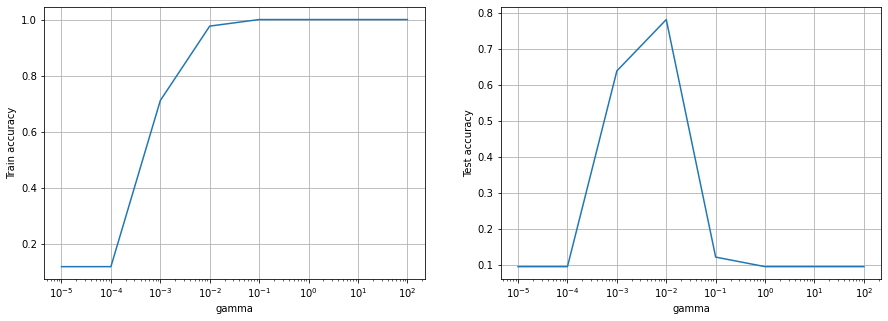

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
for i in gamma_values:
    
    svc=SVC(C=1, kernel='rbf', gamma=i)
    svc.fit(X_train, y_train)
    
    train_acc_list.append(svc.score(X_train, y_train))
    test_acc_list.append(svc.score(X_test, y_test))
    
    
    
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

## Answer 2

From the plots it easy to see that:
- the training accuracy increases with gamma, converging to 1 when gamma=$0.1$
- the test accuracy increases till gamma=$0.01$ where there is a top. Then it decreases

Comparing the two plots it is possible to assert that the best value of gamma is $0.01$, since the training accuracy and test accuracy are both high. With bigger values of gamma we have low values of test accuracy and high training accuracy. This is a classic situation of overfitting. 

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [196 187 212 215 219 214 196 179 189 193]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

svc = SVC(C=10, kernel='rbf', gamma=0.01)

svc.fit(X_train, y_train)

print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))


training_error=1-svc.score(X_train, y_train)
test_error=1-svc.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

1.0
0.8873448275862069
Best SVM training error: 0.000000
Best SVM test error: 0.112655


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e10) #a large C disables regularization

logreg.fit(X_train, y_train)

training_error=1-logreg.score(X_train, y_train)
test_error=1-logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.302448


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
logreg = linear_model.LogisticRegression(C=1) 

logreg.fit(X_train, y_train)

training_error=1-logreg.score(X_train, y_train)
test_error=1-logreg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.002500
Best regularized logistic regression test error: 0.258776


/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

## Answer 3

#### First question:
In both cases the SVM get a training error equal to $0$, but the test error coming from the SVM working on the m=2000 training dataset is almost an half of the one working on m=600 dataset. This is what we expect by increasing the dimension of the training dataset: we obtain an algortithm which has more samples to learn from. 
So getting a better result from the second case was quite predictable.

#### Second question:
Both cases of the SVM get better results of both cases of Logistic Regression in both training and test error. Even the SVM working with a dataset with dimension m=600 gets better result.


## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [19]:
#LR_prediction = # ADD CODE
#SVM_prediction = # ADD CODE

LR_prediction=logreg.predict(X_test)
LR_prediction=np.asarray(LR_prediction)

SVM_prediction=svc.predict(X_test)
SVM_prediction=np.asarray(SVM_prediction)


for i in range(np.size(SVM_prediction)):
    if y_test[i]!=LR_prediction[i] and  y_test[i]==SVM_prediction[i]:
        print(f' index and element of the test set:{i},{y_test[i]}')
        print(f' wrong prediction of the linear regeression:{LR_prediction[i]}')
        print(f' wright prediction of the SVM: {SVM_prediction[i]}')
        break

 index and element of the test set:5,7
 wrong prediction of the linear regeression:2
 wright prediction of the SVM: 7


## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

y_pred=svc.predict(X_test)
confusion_SVM = confusion_matrix(y_test, y_pred, u)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )
print("\n diag of Confusion matrix SVM  \n \n", np.diag(confusion_SVM /counts[:,None]))

y_pred=logreg.predict(X_test)
confusion_LR =  confusion_matrix(y_test, y_pred, u)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )
print("\n diag of Confusion matrix LR  \n \n", np.diag(confusion_LR /counts[:,None]))

Labels and frequencies in test set:  [5804 5813 5788 5785 5781 5786 5804 5821 5811 5807]

 Confusion matrix SVM  
 
 [[5383   12    5   19  118   69    6   84   70   38]
 [  15 5163   91   42  118   21  166    4   81  112]
 [   0  104 4646  151   81   69  435   24  209   69]
 [  16   69  107 5344   50   53   25   15   84   22]
 [ 150  115  107   48 5065   41   67   26   84   78]
 [  38   54  139  150   65 5148   75   13   88   16]
 [  19   92  235   33  261   20 5018   64   39   23]
 [  63   10   69   55  158   30   56 5298   52   30]
 [  24  156   44   88   23   45  183    7 5217   24]
 [  17  147  198   23  146   19   12   23   38 5184]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.   0.02 0.01 0.   0.01 0.01 0.01]
 [0.   0.89 0.02 0.01 0.02 0.   0.03 0.   0.01 0.02]
 [0.   0.02 0.8  0.03 0.01 0.01 0.08 0.   0.04 0.01]
 [0.   0.01 0.02 0.92 0.01 0.01 0.   0.   0.01 0.  ]
 [0.03 0.02 0.02 0.01 0.88 0.01 0.01 0.   0.01 0.01]
 [0.01 0.01 0.02 0.03 0.01 0.89 0.01 0.   0.0

/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0 1 2 3 4 5 6 7 8 9] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0 1 2 3 4 5 6 7 8 9] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


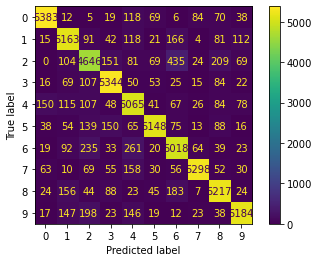

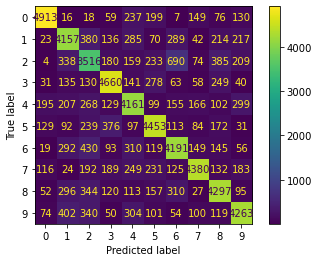

In [21]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, X_test,y_test)
plot_confusion_matrix(logreg, X_test,y_test)

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


## Answer 4

The initial table with the character and the confuion matrix are printed to better analyze the classes. 

We are going to analyze the classe with a precision of less then $0.89$.

There are three kind of classes that respect this condition: the 3rd, the 5th and the 7th (this classes are numbered such that the first element of the diagonal of the matrix, representing the class 0, is represented as the 1st).

The 5th one is characterized by an almost good precision, but it seems that the SVM tends to confuse it especially with the elements of the 7th, 8th and 10th classes. Probably the SVM recognizes them as similar and it is not able to differentiate the 5th class from these. Indeed the 7th class has the second worst pecision and the 10th one doesn't have a precision far from the 5th, while the 8th one has a very good precision because it is not confused with classes but the 5th.

The 7th and the 3rd are often confused by the SVM as it is possible to see from the confusion matrix. Indeed the elements of the confusion matrix invoving both these two classes are the highest in their corresponding rows and columns. Probably the SVM can't define a rigid difference between this two characters, which are quite similar if we base this conclusion on how they look like in the table. The 7th one is also confused with the 5th class as shown before, while the 3rd class has errors spread among all the classes. So it is obvious that the 3rd class is the most difficult to classify because the SVM can't find strong differences with almost any of the classes of the dataset. The 7th class instead is influenced mainly by two classes: the 3rd one and the 5th one.

In [22]:
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )
print("\n diag of Confusion matrix SVM  \n \n", np.diag(confusion_SVM /counts[:,None]))


 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.   0.02 0.01 0.   0.01 0.01 0.01]
 [0.   0.89 0.02 0.01 0.02 0.   0.03 0.   0.01 0.02]
 [0.   0.02 0.8  0.03 0.01 0.01 0.08 0.   0.04 0.01]
 [0.   0.01 0.02 0.92 0.01 0.01 0.   0.   0.01 0.  ]
 [0.03 0.02 0.02 0.01 0.88 0.01 0.01 0.   0.01 0.01]
 [0.01 0.01 0.02 0.03 0.01 0.89 0.01 0.   0.02 0.  ]
 [0.   0.02 0.04 0.01 0.04 0.   0.86 0.01 0.01 0.  ]
 [0.01 0.   0.01 0.01 0.03 0.01 0.01 0.91 0.01 0.01]
 [0.   0.03 0.01 0.02 0.   0.01 0.03 0.   0.9  0.  ]
 [0.   0.03 0.03 0.   0.03 0.   0.   0.   0.01 0.89]]

 diag of Confusion matrix SVM  
 
 [0.93 0.89 0.8  0.92 0.88 0.89 0.86 0.91 0.9  0.89]


The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |